In [1]:
import os

import IPython.display as ipd
import keras
import librosa
import matplotlib.pyplot as plt
import numpy as np
import random
import seaborn as sns
import tensorflow as tf

from keras.models import Sequential
from keras.layers import BatchNormalization, Conv2D, Dense, Dropout, Flatten, MaxPool2D, Reshape

In [2]:
# File path to each directory
train_path_real = '/Users/joshwinnes/Library/Mobile Documents/com~apple~CloudDocs/life things/data science/data/for-2seconds/training/real/'
train_path_fake = '/Users/joshwinnes/Library/Mobile Documents/com~apple~CloudDocs/life things/data science/data/for-2seconds/training/fake/'

test_path_real = '/Users/joshwinnes/Library/Mobile Documents/com~apple~CloudDocs/life things/data science/data/for-2seconds/testing/real/'
test_path_fake = '/Users/joshwinnes/Library/Mobile Documents/com~apple~CloudDocs/life things/data science/data/for-2seconds/testing/fake/'

validation_path_real = '/Users/joshwinnes/Library/Mobile Documents/com~apple~CloudDocs/life things/data science/data/for-2seconds/validation/real/'
validation_path_fake = '/Users/joshwinnes/Library/Mobile Documents/com~apple~CloudDocs/life things/data science/data/for-2seconds/validation/fake/'

In [3]:
# Make lists of filepaths for each audio file in each directory
train_real_audio = [os.path.join(train_path_real, file) for file in os.listdir(train_path_real) if file.endswith('.wav')]
train_fake_audio = [os.path.join(train_path_fake, file) for file in os.listdir(train_path_fake) if file.endswith('.wav')]

validation_real_audio = [os.path.join(validation_path_real, file) for file in os.listdir(validation_path_real) if file.endswith('.wav')]
validation_fake_audio = [os.path.join(validation_path_fake, file) for file in os.listdir(validation_path_fake) if file.endswith('.wav')]

test_real_audio = [os.path.join(test_path_real, file) for file in os.listdir(test_path_real) if file.endswith('.wav')]
test_fake_audio = [os.path.join(test_path_fake, file) for file in os.listdir(test_path_fake) if file.endswith('.wav')]

In [4]:
# Making sure the lists work
random_audio_file = train_real_audio[random.randint(0, len(train_real_audio))]
ipd.Audio(random_audio_file)

In [5]:
random_audio_file = train_fake_audio[random.randint(0, len(train_fake_audio))]
ipd.Audio(random_audio_file)

In [6]:
random_audio_file = test_real_audio[random.randint(0, len(test_real_audio))]
ipd.Audio(random_audio_file)

In [7]:
random_audio_file = test_fake_audio[random.randint(0, len(test_fake_audio))]
ipd.Audio(random_audio_file)

In [8]:
random_audio_file = validation_real_audio[random.randint(0, len(validation_real_audio))]
ipd.Audio(random_audio_file)

In [9]:
random_audio_file = validation_fake_audio[random.randint(0, len(validation_fake_audio))]
ipd.Audio(random_audio_file)

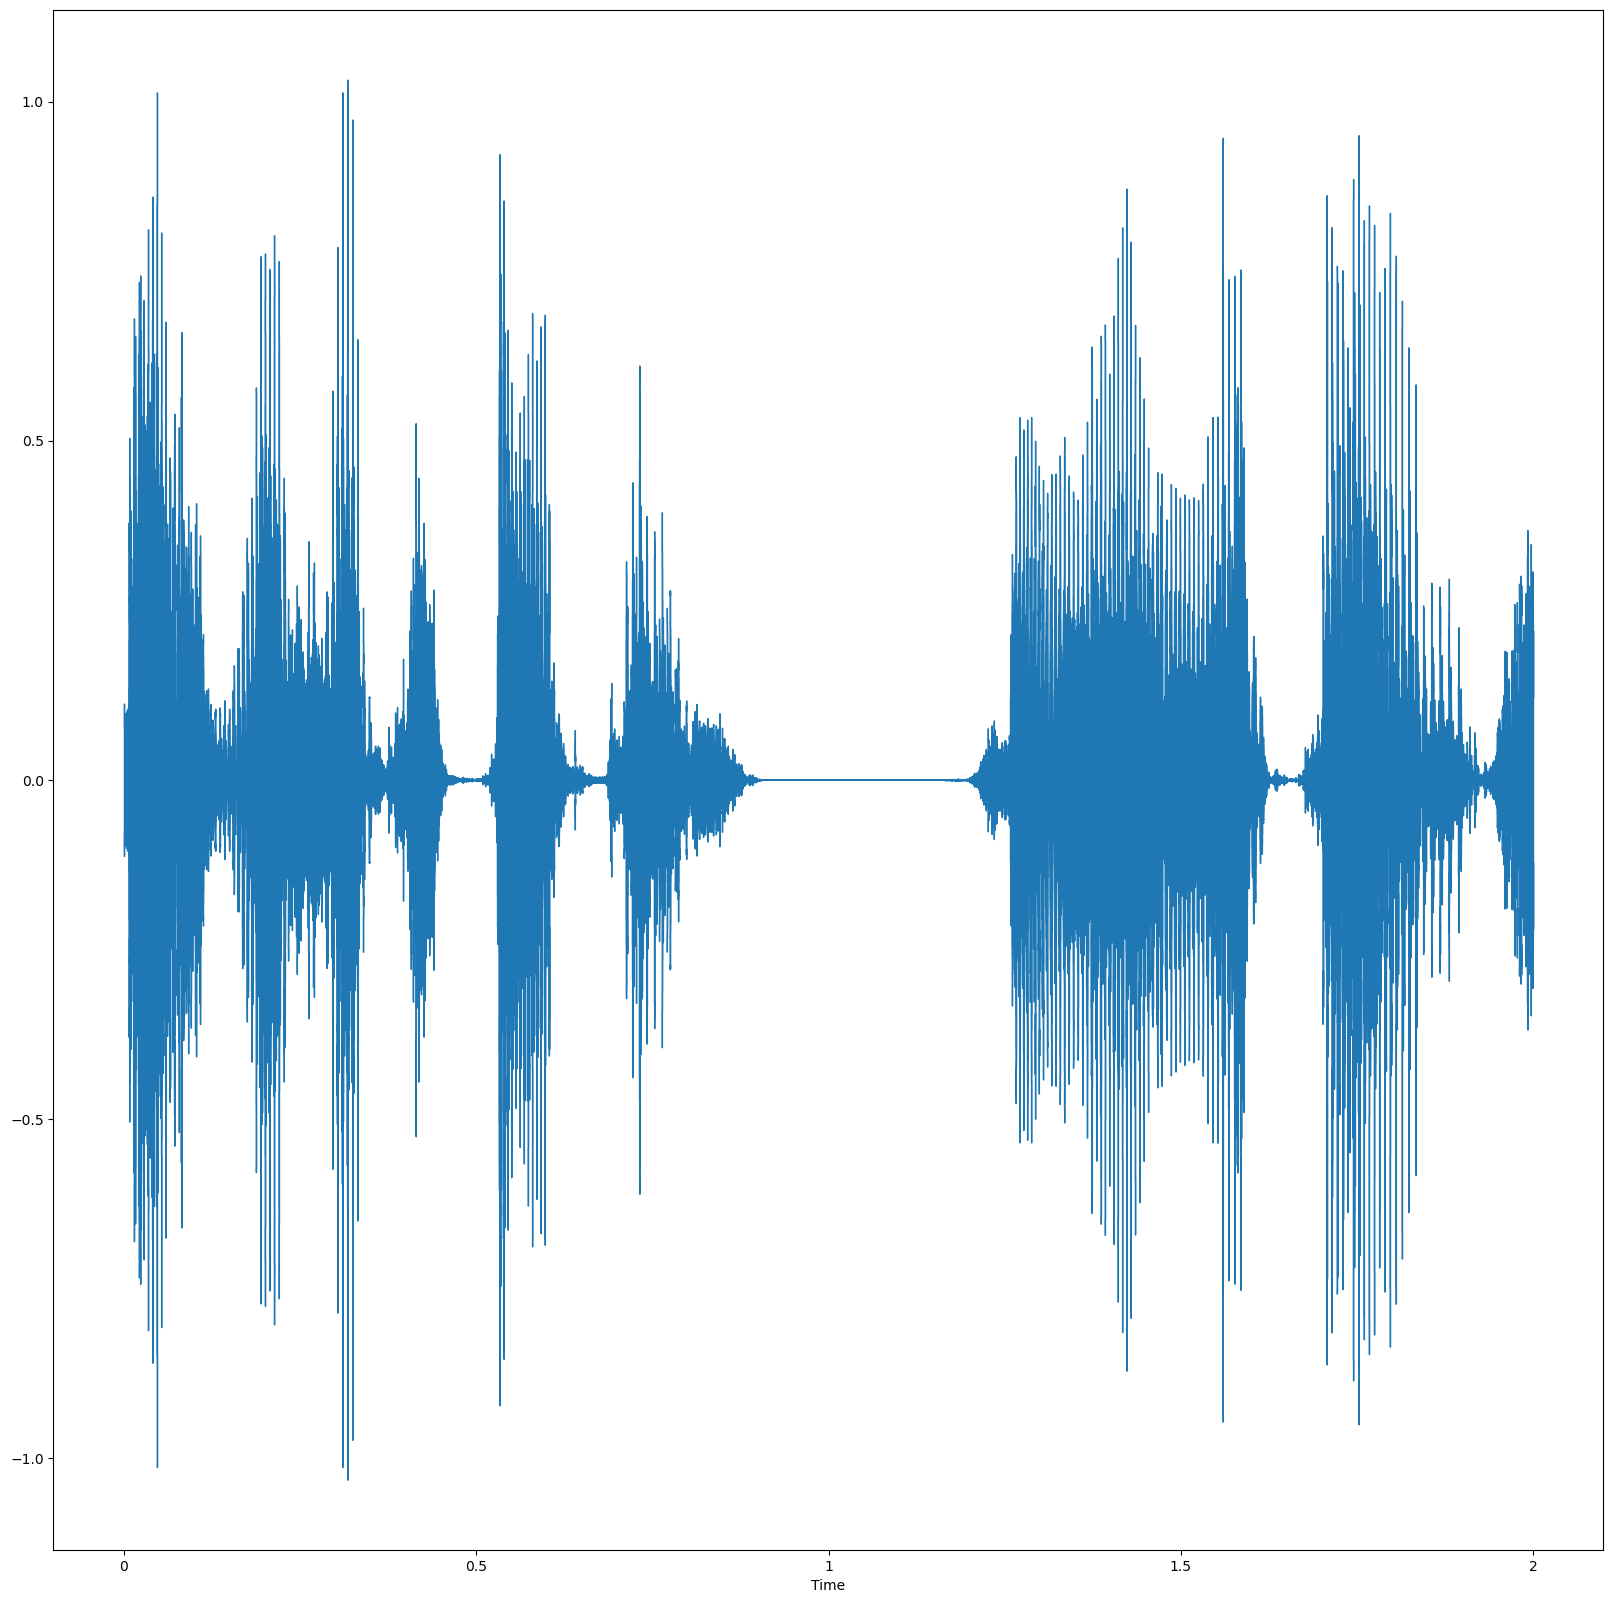

In [10]:
# Visualize the wafeforms using Librosa
x, sr = librosa.load(random_audio_file)
plt.figure(figsize=(20,20))
librosa.display.waveshow(x, sr=sr)

In [11]:
# Convert audio file to mel-scale spectrogram

def convert_to_melscale_spectrogram(file_path):
    x, sr = librosa.load(file_path)
    mel_spectrogram = librosa.feature.melspectrogram(y=x, sr=sr)
    mel_db_spect = librosa.power_to_db(mel_spectrogram, ref=np.max)
    return mel_db_spect

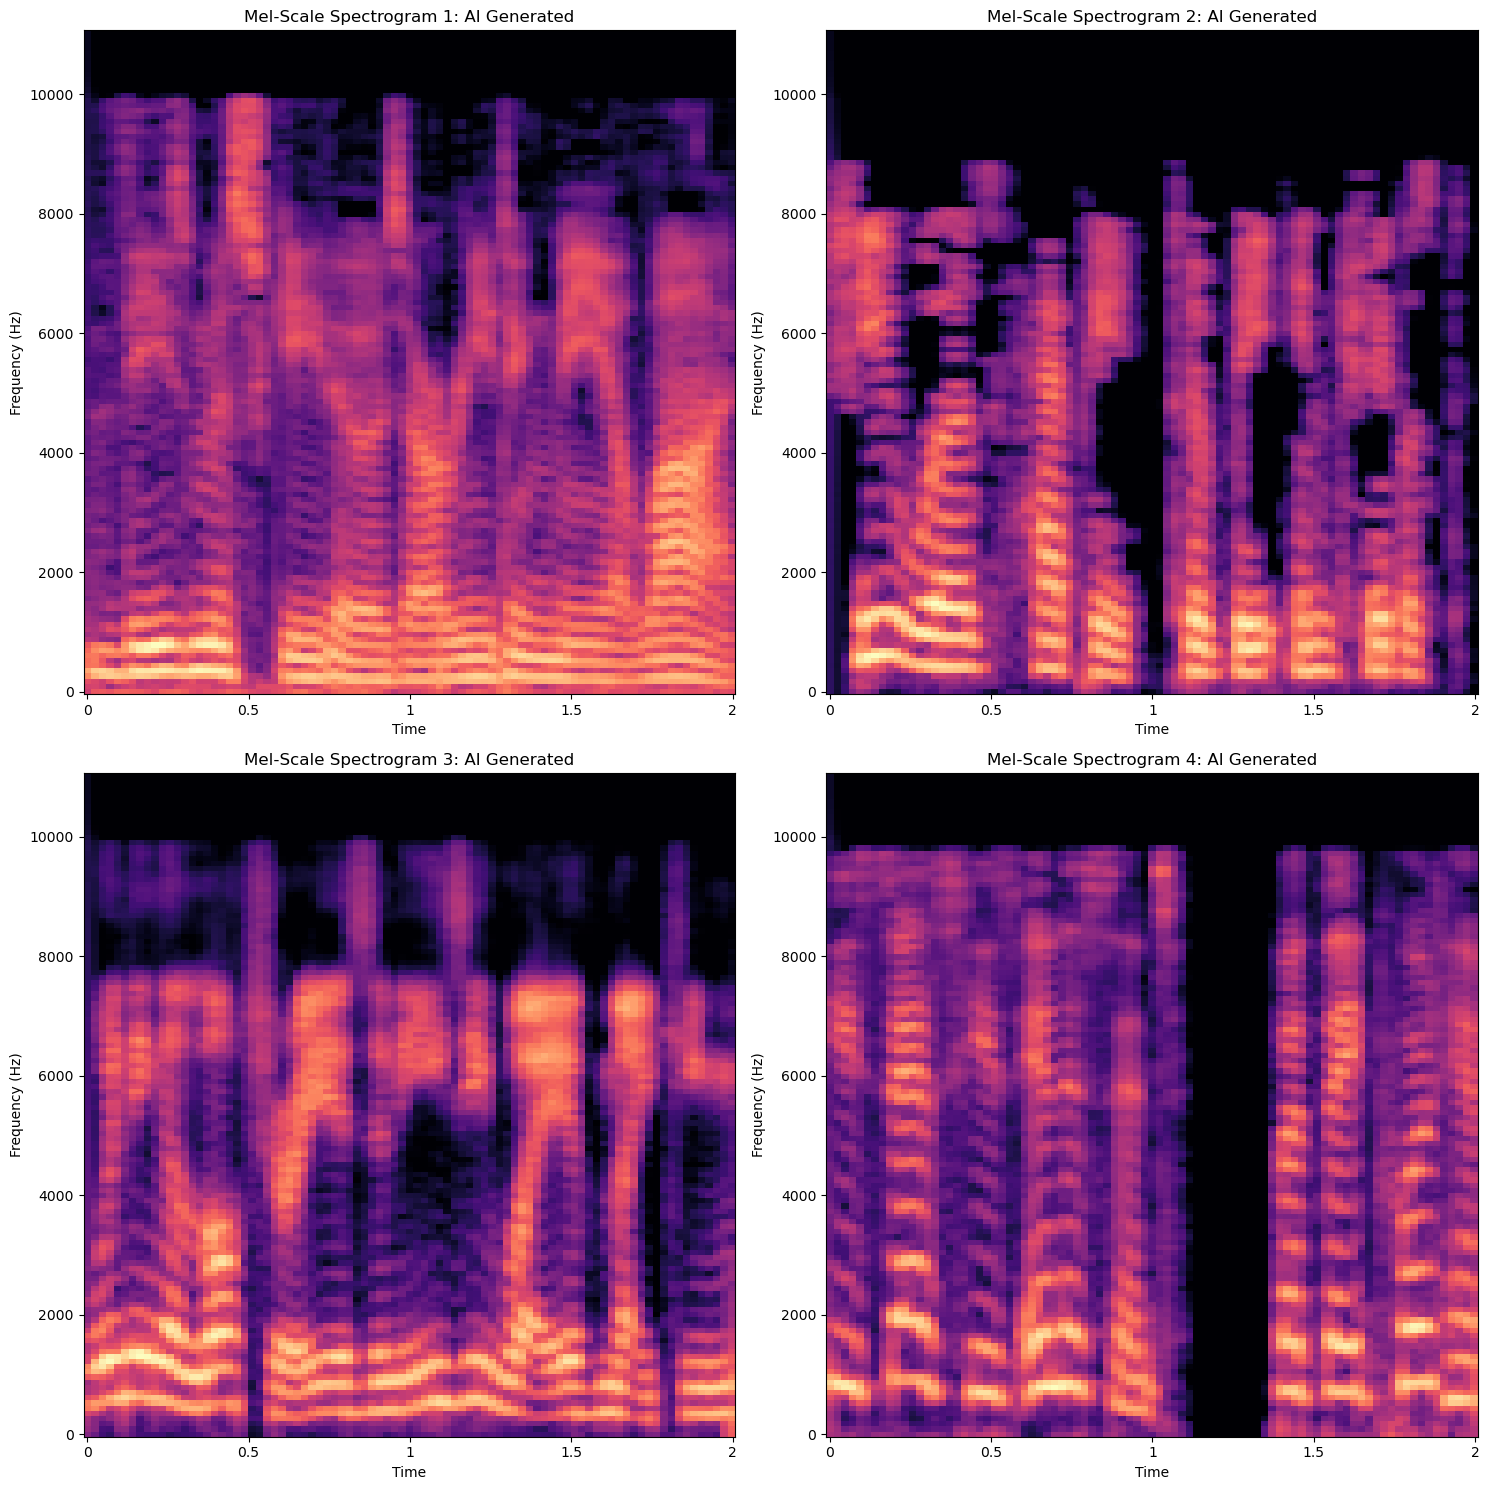

In [12]:
# testing convert_to_melscale_spectrogram() function with audio file above

fig, axs = plt.subplots(2,2, figsize=(15,15))    
# Loop over the axes and plot a random spectrogram on each
for i, ax in enumerate(axs.flat):
    random_audio_file = validation_fake_audio[random.randint(0, len(validation_fake_audio))]
    test_spec = convert_to_melscale_spectrogram(random_audio_file)  # Get the spectrogram for the current file
    
    # Display the mel spectrogram on the current axis
    librosa.display.specshow(test_spec, x_axis='time', y_axis='hz', ax=ax)
    
    # Set the title and labels for the current subplot
    ax.set_title(f'Mel-Scale Spectrogram {i + 1}: AI Generated')
    ax.set_xlabel('Time')
    ax.set_ylabel('Frequency (Hz)')

# Automatically adjust the layout to avoid overlap
plt.tight_layout()

# Show the plots
plt.show()

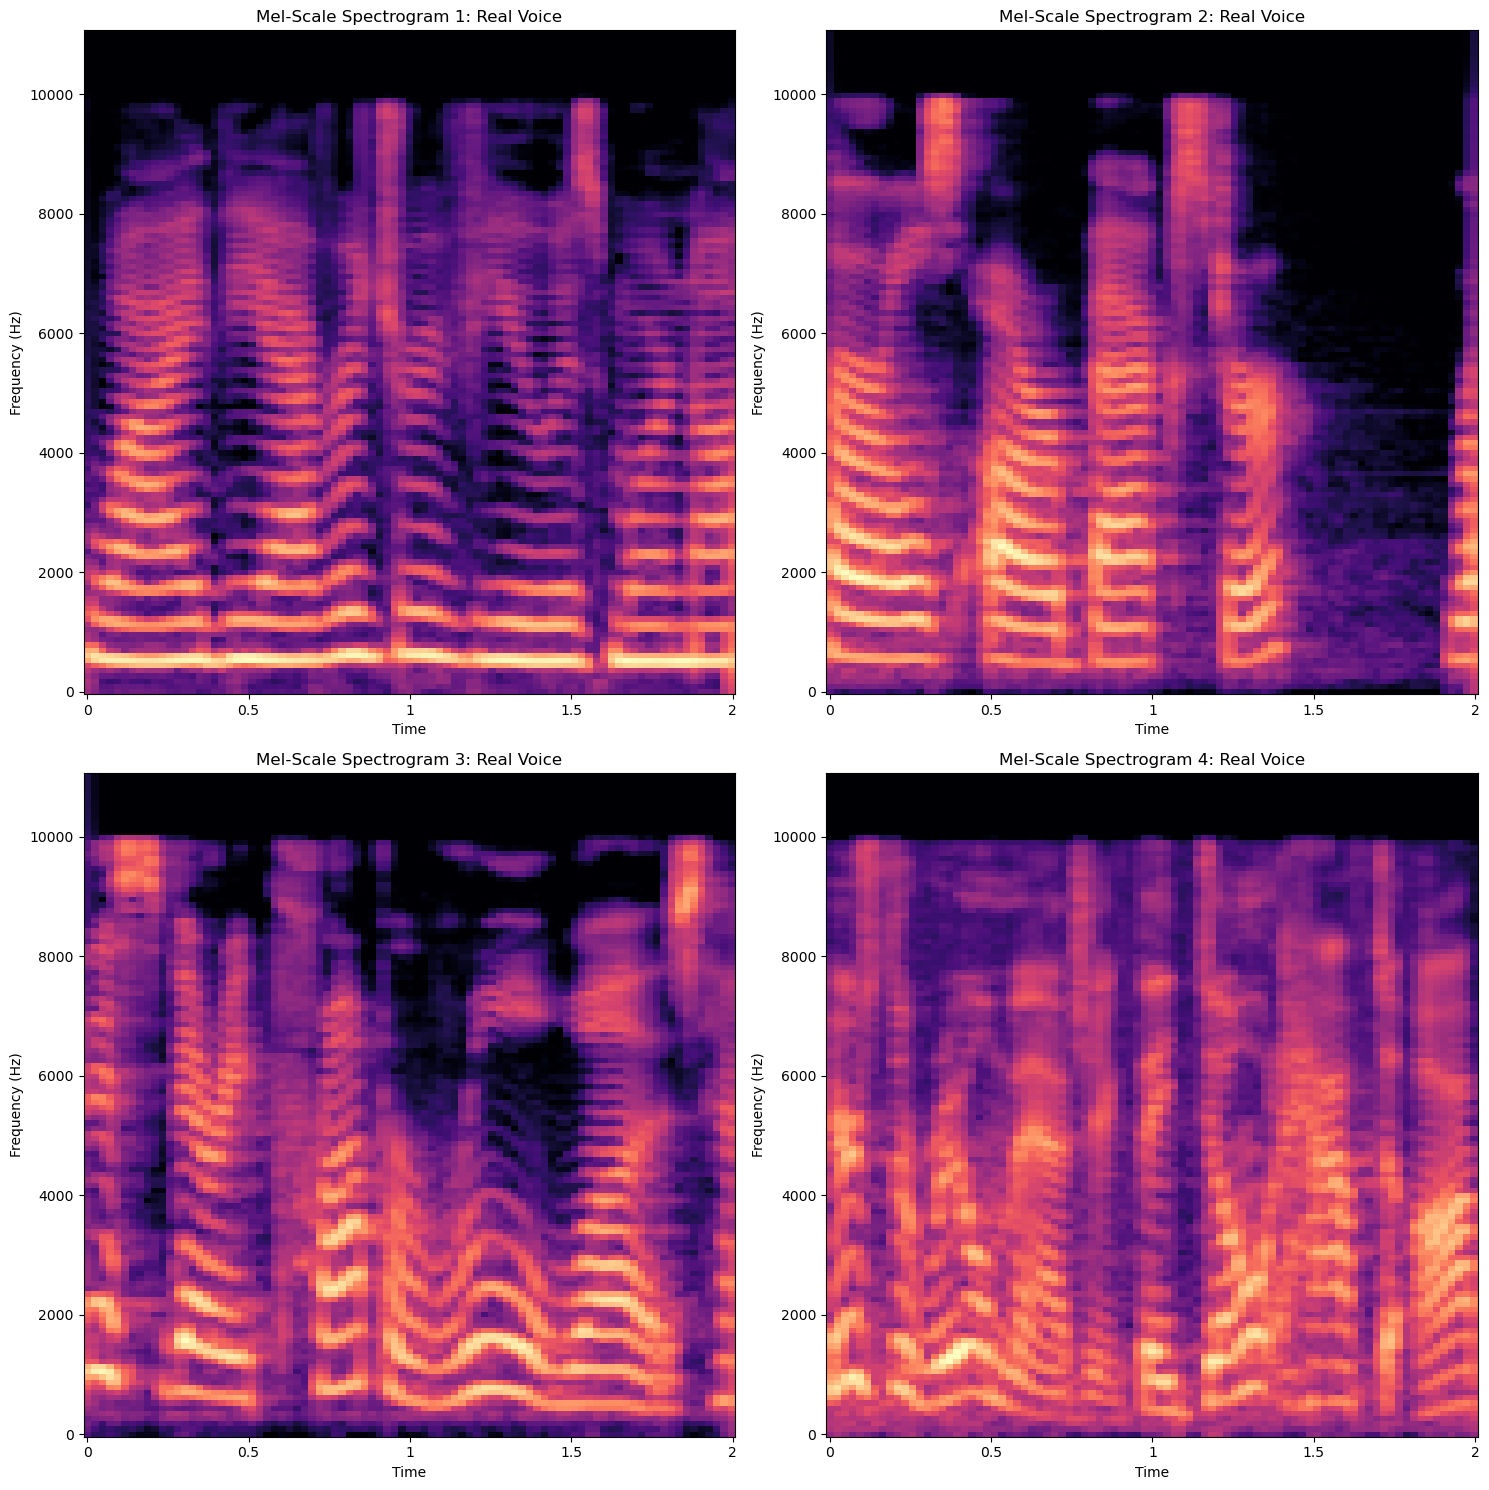

In [13]:
# Comparing AI generated mel-scale spectrogram to real spectrogram
fig, axs = plt.subplots(2,2, figsize=(15,15))    
# Loop over the axes and plot a random spectrogram on each
for i, ax in enumerate(axs.flat):
    random_audio_file = validation_real_audio[random.randint(0, len(validation_real_audio))]
    test_spec = convert_to_melscale_spectrogram(random_audio_file)  # Get the spectrogram for the current file
    
    # Display the mel spectrogram on the current axis
    librosa.display.specshow(test_spec, x_axis='time', y_axis='hz', ax=ax)
    
    # Set the title and labels for the current subplot
    ax.set_title(f'Mel-Scale Spectrogram {i + 1}: Real Voice')
    ax.set_xlabel('Time')
    ax.set_ylabel('Frequency (Hz)')

# Automatically adjust the layout to avoid overlap
plt.tight_layout()

# Show the plots
plt.show()

In [14]:
# Use spectrograms as features to train the model
def get_features_and_labels(real_audio_files, fake_audio_files):
    spec_arr = []
    labels = []
    
    for file in real_audio_files:
        spectrogram = convert_to_melscale_spectrogram(file)
        spec_arr.append(spectrogram)
        labels.append(0)
    for file in fake_audio_files:
        spectrogram = convert_to_melscale_spectrogram(file)
        spec_arr.append(spectrogram)
        labels.append(1)
    
    return np.array(spec_arr), np.array(labels)

train_features, train_labels = get_features_and_labels(train_real_audio, train_fake_audio)
validation_features, validation_labels = get_features_and_labels(validation_real_audio, validation_fake_audio)
test_features, test_labels = get_features_and_labels(test_real_audio, test_fake_audio)

/var/folders/99/6591xgpn4sq1ypfgnrzy_7n80000gn/T/ipykernel_16177/1910288973.py:4: UserWarning: PySoundFile failed. Trying audioread instead.
  x, sr = librosa.load(file_path)
/Users/joshwinnes/anaconda3/envs/voice/lib/python3.12/site-packages/librosa/core/audio.py:184: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


In [15]:
print("train features shape: {}".format(train_features.shape))
print("test features shape: {}".format(test_features.shape))

train features shape: (13956, 128, 87)
test features shape: (1088, 128, 87)


In [42]:
# Significantly trimmed VGG model to optimize results

trimmed_vgg = Sequential()
trimmed_vgg.add(Reshape((64, 58, 3),input_shape=train_features.shape[1:])) #input layer

trimmed_vgg.add(Conv2D(filters=64, kernel_size=(3,3), padding="same", activation='relu')) # Concolutional Layers
trimmed_vgg.add(Conv2D(filters=64, kernel_size=(3,3), padding="same", activation='relu')) # another convolutional layer
trimmed_vgg.add(MaxPool2D(pool_size=(2,2), strides=(2,2))) # Pooling layer to reduce dimension of input feature maps

trimmed_vgg.add(Conv2D(filters=128, kernel_size=(3,3), padding="same", activation='relu')) # More convolutional layers
trimmed_vgg.add(Conv2D(filters=128, kernel_size=(3,3), padding="same", activation='relu')) # more convolutional layers
trimmed_vgg.add(MaxPool2D(pool_size=(2,2), strides=(2,2))) # another pooling layer to reduce dimension of input feature maps

trimmed_vgg.add(Flatten()) #flattening layer to flatten input feature maps in order to link convolutional layers to fully connected layers
trimmed_vgg.add(Dense(units=256,activation="relu")) #fully connected layer
trimmed_vgg.add(Dense(units=256,activation="relu")) #fully connected layer
trimmed_vgg.add(Dense(1, activation="sigmoid")) #sigmoid function outputs binary output based on probability

trimmed_vgg.summary()

/Users/joshwinnes/anaconda3/envs/voice/lib/python3.12/site-packages/keras/src/layers/reshaping/reshape.py:39: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ reshape_3 (Reshape)             │ (None, 64, 58, 3)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_16 (Conv2D)              │ (None, 64, 58, 64)     │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_17 (Conv2D)              │ (None, 64, 58, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_8 (MaxPooling2D)  │ (None, 32, 29, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_18 (Conv2D)              │ (None, 32, 29, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_19 (Conv2D)              │ (None, 32, 29, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_9 (MaxPooling2D)  │ (None, 16, 14, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_3 (Flatten)             │ (None, 28672)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 256)            │     7,340,288 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 256)            │        65,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 1)              │           257 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 7,666,497 (29.25 MB)

 Trainable params: 7,666,497 (29.25 MB)

 Non-trainable params: 0 (0.00 B)

In [44]:
trimmed_vgg.compile(optimizer=keras.optimizers.Adam(),
                    loss=keras.losses.binary_crossentropy, 
                    metrics=["accuracy"])

In [45]:
trimmed_vgg_history = trimmed_vgg.fit(train_features,
                                      train_labels,
                                      validation_data = [validation_features, validation_labels],
                                      batch_size = 32,
                                      epochs = 10,
                                      steps_per_epoch = 300)

Epoch 1/10
300/300 ━━━━━━━━━━━━━━━━━━━━ 109s 360ms/step - accuracy: 0.6548 - loss: 2.7299 - val_accuracy: 0.9335 - val_loss: 0.1647
Epoch 2/10
137/300 ━━━━━━━━━━━━━━━━━━━━ 55s 339ms/step - accuracy: 0.9067 - loss: 0.2192

/Users/joshwinnes/anaconda3/envs/voice/lib/python3.12/contextlib.py:158: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(value)


300/300 ━━━━━━━━━━━━━━━━━━━━ 56s 185ms/step - accuracy: 0.9140 - loss: 0.2055 - val_accuracy: 0.9728 - val_loss: 0.0793
Epoch 3/10
300/300 ━━━━━━━━━━━━━━━━━━━━ 123s 410ms/step - accuracy: 0.9576 - loss: 0.1085 - val_accuracy: 0.9774 - val_loss: 0.0702
Epoch 4/10
300/300 ━━━━━━━━━━━━━━━━━━━━ 61s 202ms/step - accuracy: 0.9753 - loss: 0.0658 - val_accuracy: 0.9802 - val_loss: 0.0739
Epoch 5/10
300/300 ━━━━━━━━━━━━━━━━━━━━ 120s 402ms/step - accuracy: 0.9829 - loss: 0.0486 - val_accuracy: 0.9919 - val_loss: 0.0307
Epoch 6/10
300/300 ━━━━━━━━━━━━━━━━━━━━ 61s 203ms/step - accuracy: 0.9858 - loss: 0.0416 - val_accuracy: 0.9869 - val_loss: 0.0412
Epoch 7/10
300/300 ━━━━━━━━━━━━━━━━━━━━ 123s 411ms/step - accuracy: 0.9873 - loss: 0.0361 - val_accuracy: 0.9866 - val_loss: 0.0379
Epoch 8/10
137/300 ━━━━━━━━━━━━━━━━━━━━ 59s 367ms/step - accuracy: 0.9835 - loss: 0.0570 

2024-12-17 22:52:05.571122: I tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


300/300 ━━━━━━━━━━━━━━━━━━━━ 60s 199ms/step - accuracy: 0.9852 - loss: 0.0481 - val_accuracy: 0.9858 - val_loss: 0.0376
Epoch 9/10
300/300 ━━━━━━━━━━━━━━━━━━━━ 122s 407ms/step - accuracy: 0.9736 - loss: 0.0705 - val_accuracy: 0.9894 - val_loss: 0.0322
Epoch 10/10
300/300 ━━━━━━━━━━━━━━━━━━━━ 64s 212ms/step - accuracy: 0.9951 - loss: 0.0160 - val_accuracy: 0.9926 - val_loss: 0.0289


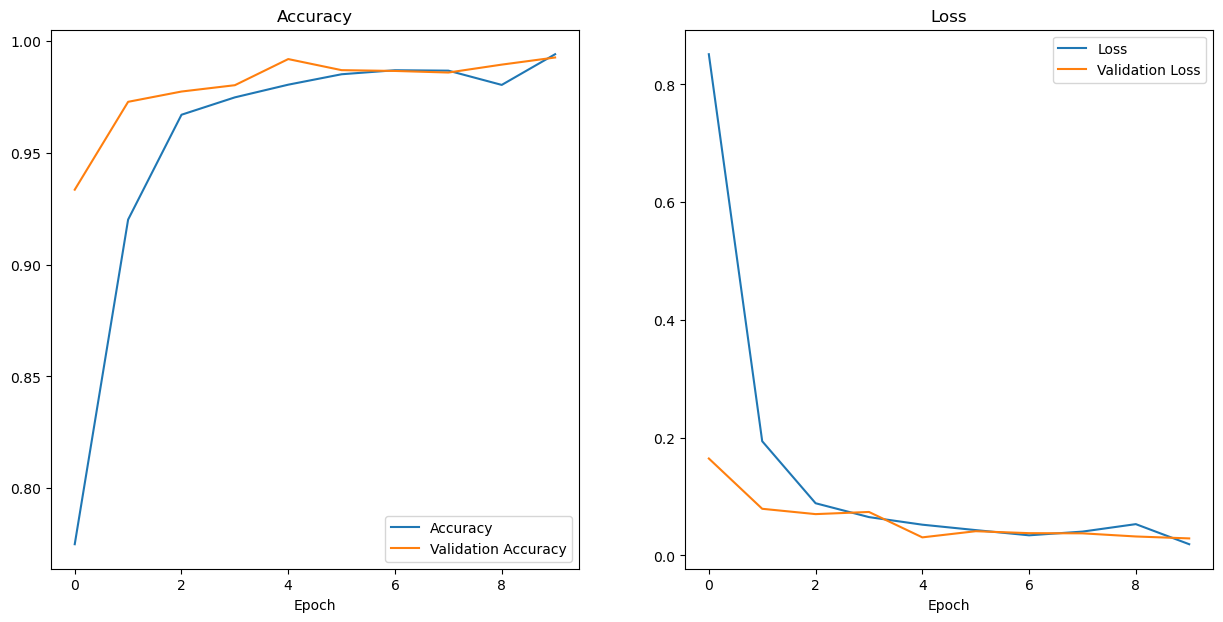

In [52]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 7))

ax1.plot(trimmed_vgg_history.history["accuracy"])
ax1.plot(trimmed_vgg_history.history['val_accuracy'])
ax1.set_title("Accuracy")
ax1.set_xlabel("Epoch")
ax1.legend(["Accuracy","Validation Accuracy"])

ax2.plot(trimmed_vgg_history.history["loss"])
ax2.plot(trimmed_vgg_history.history["val_loss"])
ax2.set_title("Loss")
ax2.set_xlabel("Epoch")
ax2.legend(["Loss","Validation Loss"])

plt.show()

In [53]:
trimmed_vgg_loss, trimmed_vgg_accuracy = trimmed_vgg.evaluate(test_features, test_labels)

34/34 ━━━━━━━━━━━━━━━━━━━━ 3s 88ms/step - accuracy: 0.9696 - loss: 0.0978


In [69]:
y_pred = trimmed_vgg.predict(test_features)

34/34 ━━━━━━━━━━━━━━━━━━━━ 3s 87ms/step


<Axes: ylabel='Count'>

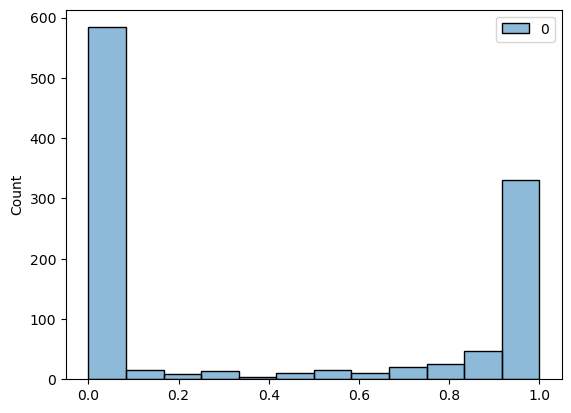

In [70]:
sns.histplot(data=y_pred)

In [71]:
y_pred_binary = (y_pred>0.5).astype(int)

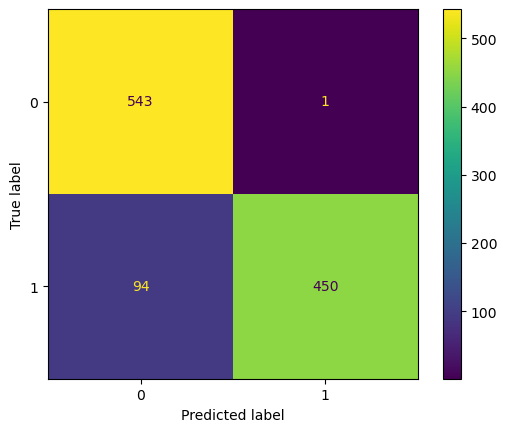

In [74]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_pred=y_pred_binary, y_true=test_labels)
disp = ConfusionMatrixDisplay(cm)
disp.plot()

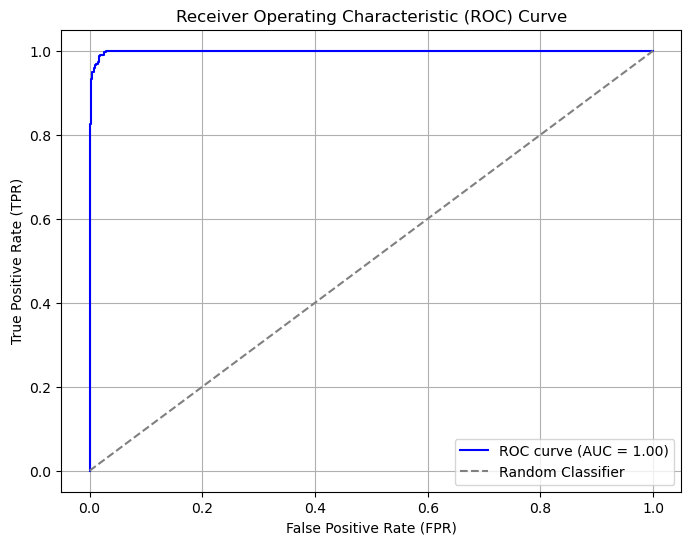

In [75]:
from sklearn.metrics import roc_curve, roc_auc_score

y_true = test_labels
y_scores = y_pred

# Step 1: Calculate FPR, TPR, and thresholds
fpr, tpr, thresholds = roc_curve(y_true, y_scores)

# Step 2: Compute AUC
auc = roc_auc_score(y_true, y_scores)

# Step 3: Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label=f"ROC curve (AUC = {auc:.2f})")
plt.plot([0, 1], [0, 1], color='gray', linestyle='--', label="Random Classifier")
plt.xlabel("False Positive Rate (FPR)")
plt.ylabel("True Positive Rate (TPR)")
plt.title("Receiver Operating Characteristic (ROC) Curve")
plt.legend(loc="lower right")
plt.grid()
plt.show()

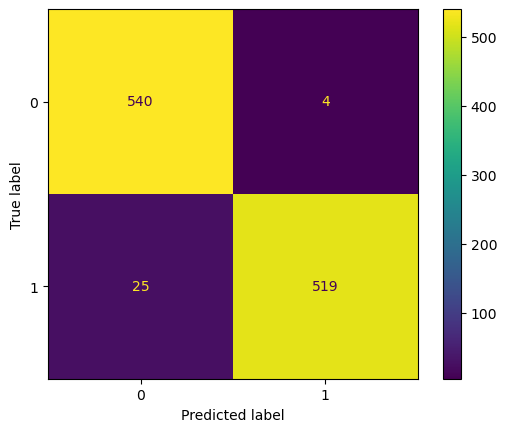

In [78]:
y_pred_binary2 = (y_pred>0.02).astype(int)
cm2 = confusion_matrix(y_pred=y_pred_binary2, y_true=test_labels)
display = ConfusionMatrixDisplay(cm2)
display.plot()